<a href="https://colab.research.google.com/github/JustRudyRodriguez/Habit_Helper/blob/master/CS410_Amani%26Nam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
file = ('/content/gdrive/MyDrive/CS410_FinalProject/reading_habit.csv')
df = pd.read_csv(file) 
df

,Age,Sex,Race,Marital status?,Education,Employement,Incomes,How many books did you read during last 12months?,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?,"Last book you read, you…",Do you happen to read any daily news or newspapers?,Do you happen to read any magazines or journals?
0,66,Male,Refused,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,Yes,No,Yes,Purchased the book,No,Yes
1,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Yes,Yes,Purchased the book,Yes,Yes
2,32,Male,Mixed race,Never been married,High school graduate,Employed full-time,"Less than $10,000",97,No,Yes,Yes,Borrowed the book from a friend or family member,Yes,Yes
3,27,Male,Mixed race,Married,High school graduate,Employed full-time,"$40,000 to under $50,000",97,Yes,No,Yes,Borrowed the book from a library,Yes,No
4,16,Female,Mixed race,Never been married,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,Yes,Yes,No,Purchased the book,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827,18,Male,White,Never been married,High school graduate,Employed part-time,"$75,000 to under $100,000",0,NaN,NaN,NaN,NaN,Yes,Yes
2828,17,Male,White,Never been married,High school incomplete,Employed part-time,"$30,000 to under $40,000",0,NaN,NaN,NaN,NaN,Yes,No
2829,17,Female,White,Never been married,High school incomplete,Not employed for pay,"9$100,000 to under $150,000",0,NaN,NaN,NaN,NaN,No,Yes
2830,16,Male,White,Never been married,High school graduate,Not employed for pay,"9$100,000 to under $150,000",0,NaN,NaN,NaN,NaN,No,No


In [ ]:
from pathlib import Path
import os
# File Size
df_path =Path('/content/gdrive/MyDrive/CS410_FinalProject')/'reading_habit.csv'
print(f'File size: {os.path.getsize(df_path) / 1024:0.2f} KiB')

File size: 401.75 KiB


In [ ]:
from pathlib import Path

# Finding the Format
def head(filepath, n=7):
    with filepath.open() as f:
        for _ in range(n):
            print(f.readline(), end='')
head(df_path)


Age,Sex,Race,Marital status?,Education,Employement,Incomes,How many books did you read during last 12months?,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?,"Last book you read, you…",Do you happen to read any daily news or newspapers?,Do you happen to read any magazines or journals?
66,Male,Refused,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,Yes,No,Yes,Purchased the book,No,Yes
46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Yes,Yes,Purchased the book,Yes,Yes
32,Male,Mixed race,Never been married,High school graduate,Employed full-time,"Less than $10,000",97,No,Yes,Yes,Borrowed the book from a friend or family member,Yes,Yes
27,Male,Mixed race,Married,High school graduate,Employed full-time,"$40,000 to under $50,000",97,Yes,No,Yes,Borrowed the book from a library,Yes,No
16,Female,Mixed race,Never been married,High school i

It is Delimited format since there is a comma that seperate the data values.

In [ ]:
# File Encoding
import chardet
encoding = chardet.detect(df_path.read_bytes())['encoding']
print(f'File encoding: {encoding}')

File encoding: utf-8


In [ ]:
# Granularity
print("Reading Habit shape:", df.shape) 

Reading Habit shape: (2832, 14)


In [ ]:
# Quality Check
df.isnull().sum()

Age                                                      0
Sex                                                      0
Race                                                     0
Marital status?                                          0
Education                                                0
Employement                                              0
Incomes                                                  0
How many books did you read during last 12months?        0
Read any printed books during last 12months?           390
Read any audiobooks during last 12months?              390
Read any e-books during last 12months?                 390
Last book you read, you…                               390
Do you happen to read any daily news or newspapers?      0
Do you happen to read any magazines or journals?         0
dtype: int64

In [ ]:
# Scope of the education
df['Education'].value_counts().tail(10)  

High school graduate                                        688
Some college, no 4-year degree                              651
College graduate                                            597
Post-graduate training/professional school after college    501
High school incomplete                                      263
Technical, trade or vocational school AFTER high school      66
None                                                         58
Don’t know                                                    8
Name: Education, dtype: int64

In [ ]:
# Scope of the incomes
df['Incomes'].value_counts().tail(10)

$100,000 to under $150,000     530
$50,000 to under $75,000       394
$75,000 to under $100,000      316
Refused                        291
$30,000 to under $40,000       265
$20,000 to under $30,000       238
$10,000 to under $20,000       216
9$100,000 to under $150,000    212
$40,000 to under $50,000       207
Less than $10,000              163
Name: Incomes, dtype: int64

In [ ]:
# Scope of the Employement
df['Employement'].value_counts().tail(10)

Employed full-time                 1238
Retired                             605
Not employed for pay                474
Employed part-time                  355
Disabled                             70
Have own business/self-employed      53
Student                              22
Other                                15
Name: Employement, dtype: int64

In [ ]:
# Quality of Relationships between Age and Education
display(pd.crosstab(df['Age'], df['Education'])[:10])

Education,College graduate,Don’t know,High school graduate,High school incomplete,None,Post-graduate training/professional school after college,"Some college, no 4-year degree","Technical, trade or vocational school AFTER high school"
Age,,,,,,,,
16,0,1,3,59,5,0,0,0
17,0,0,7,61,0,0,0,0
18,0,0,35,15,1,0,8,0
19,0,0,19,1,0,0,14,0
20,1,0,7,1,1,0,24,0
21,2,0,10,3,0,0,23,1
22,7,0,10,3,1,4,19,1
23,8,0,12,1,0,3,17,0
24,12,0,7,0,0,5,8,2


In [ ]:
# Rename long named feature
df.columns = df.columns.str.replace('How many books did you read during last 12months?', 'N_of_Books')

<ipython-input-13-2b786763cf3e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('How many books did you read during last 12months?', 'N_of_Books')


In [ ]:
# Drop features that we are not interested in to answer our questions

new_df = df.drop(columns = ['Read any printed books during last 12months?', 'Read any audiobooks during last 12months?', 'Read any e-books during last 12months?',
                            'Last book you read, you…', 'Do you happen to read any daily news or newspapers?', 'Do you happen to read any magazines or journals?' ], axis=1)

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              2832 non-null   int64 
 1   Sex              2832 non-null   object
 2   Race             2832 non-null   object
 3   Marital status?  2832 non-null   object
 4   Education        2832 non-null   object
 5   Employement      2832 non-null   object
 6   Incomes          2832 non-null   object
 7   N_of_Books?      2832 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 177.1+ KB


In [ ]:
new_df

,Age,Sex,Race,Marital status?,Education,Employement,Incomes,N_of_Books?
0,66,Male,Refused,Divorced,College graduate,Retired,"$20,000 to under $30,000",97
1,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"Less than $10,000",97
2,32,Male,Mixed race,Never been married,High school graduate,Employed full-time,"Less than $10,000",97
3,27,Male,Mixed race,Married,High school graduate,Employed full-time,"$40,000 to under $50,000",97
4,16,Female,Mixed race,Never been married,High school incomplete,Employed part-time,"$10,000 to under $20,000",97
...,...,...,...,...,...,...,...,...
2827,18,Male,White,Never been married,High school graduate,Employed part-time,"$75,000 to under $100,000",0
2828,17,Male,White,Never been married,High school incomplete,Employed part-time,"$30,000 to under $40,000",0
2829,17,Female,White,Never been married,High school incomplete,Not employed for pay,"9$100,000 to under $150,000",0
2830,16,Male,White,Never been married,High school graduate,Not employed for pay,"9$100,000 to under $150,000",0


In [ ]:
#new_df = new_df[new_df['Race'] == 'White']
#new_df

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error as mae

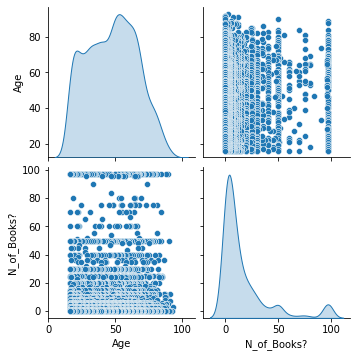

In [ ]:
import seaborn as sns
# Pairplot for Numerical values in our dataset
sns.pairplot(data=df, diag_kind='kde')

From the above plot:

Age follows a normal distribution.

N_of_Books is skewed to the right.

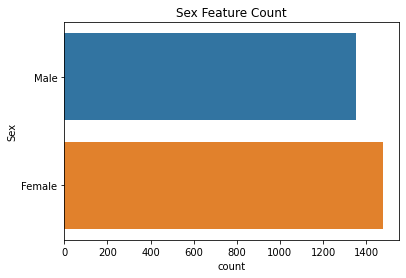

In [ ]:
# Plotting Categorical Features
# Sex Feature
sns.countplot(y ='Sex', data = df)
plt.title("Sex Feature Count")
plt.show()

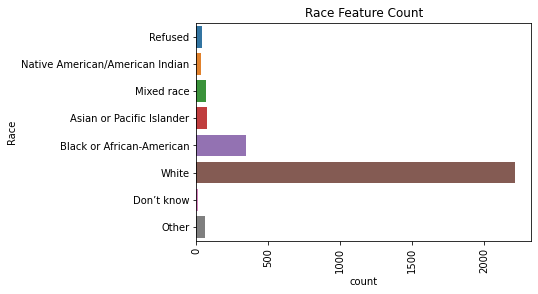

In [ ]:
# Race Feature
plot = sns.countplot(y ='Race', data = df)
plot = plt.xticks(rotation='vertical')
plt.title("Race Feature Count")
plt.show()

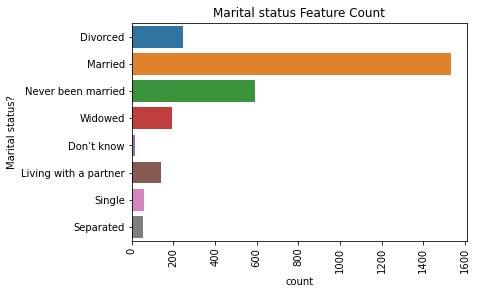

In [ ]:
# Marital status? Feature
plot = sns.countplot(y ='Marital status?', data = df)
plot = plt.xticks(rotation='vertical')
plt.title("Marital status Feature Count")
plt.show()

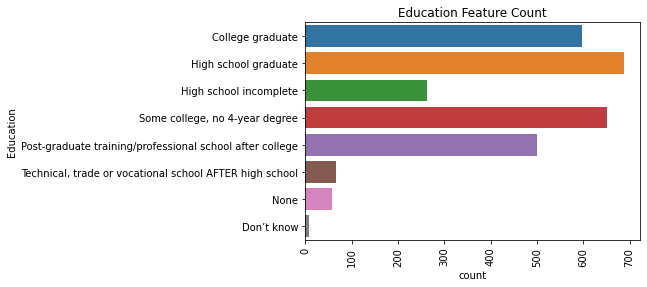

In [ ]:
# Education Feature
plot = sns.countplot(y ='Education', data = df)
plot = plt.xticks(rotation='vertical')
plt.title("Education Feature Count")
plt.show()

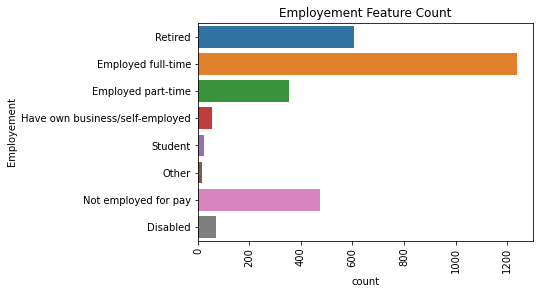

In [ ]:
# Employement Feature
plot = sns.countplot(y ='Employement', data = df)
plot = plt.xticks(rotation='vertical')
plt.title("Employement Feature Count")
plt.show()

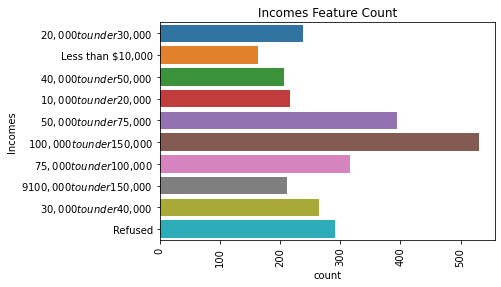

In [ ]:
# Incomes Feature
plot = sns.countplot(y ='Incomes', data = df)
plot = plt.xticks(rotation='vertical')
plt.title("Incomes Feature Count")
plt.show()

[Text(0.5, 1.0, 'Education vs Number of Books')]

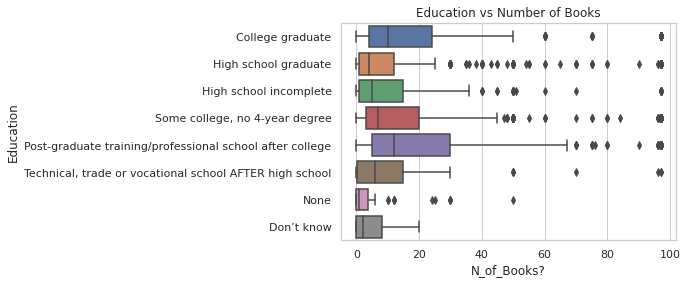

In [ ]:
import seaborn
# plotting qualitative vs quantitative features using box plot
# (Education vs Number of Books) relationship visualization
seaborn.set(style="whitegrid")
seaborn.boxplot(y = 'Education', x = 'N_of_Books?', data = new_df).set(title='Education vs Number of Books')

[Text(0.5, 1.0, 'Employement vs Number of Books')]

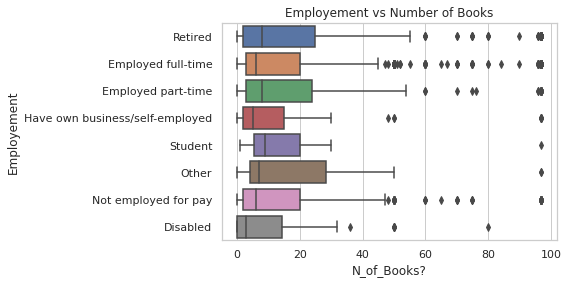

In [ ]:
# (Employement vs Number of Books) relationship visualization
seaborn.boxplot(y = 'Employement', x = 'N_of_Books?', data = new_df).set(title='Employement vs Number of Books')

[Text(0.5, 1.0, 'Incomes vs Number of Books')]

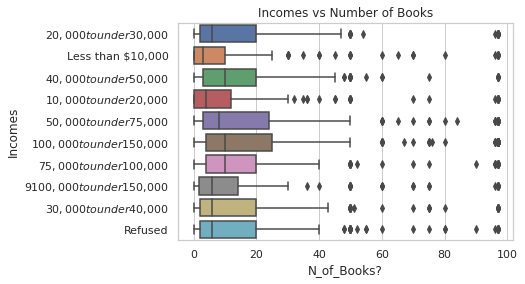

In [ ]:
# (Incomes vs Number of Books) relationship visualization
seaborn.boxplot(y = 'Incomes', x = 'N_of_Books?', data = new_df).set(title='Incomes vs Number of Books')

[Text(0.5, 1.0, 'Correlation between Age and Number of Books')]

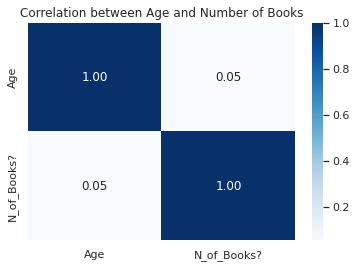

In [ ]:
# The heatmap shows the correlation with numerical values. Numerical values in our dataset are two: AGe and Number of Books
import matplotlib.pyplot as plt
correlation = df.corr()
sns.heatmap(correlation, annot = True, fmt = '.2f', cmap = 'Blues').set(title='Correlation between Age and Number of Books')

Correlation values range from -1 (negative correlation)  to +1 (positive correlation), if the value is equal to zero, there is no correlation.
 
 
We observe from the heatmap that the age feature has positive/weak correlation with the N_of_Book feature. 


In [ ]:
# Define the upper and lower limit for the age outliers
upper_limit = new_df['Age'].quantile(0.99)
lower_limit = new_df['Age'].quantile(0.01)
print('Upper limit', upper_limit)
print('Lower limit',lower_limit)

Upper limit 85.0
Lower limit 16.0


In [ ]:
# Filtering the outliers from age feature
new_df = new_df[(new_df['Age'] <= 85.0) & (new_df['Age'] >= 16.0)]

In [ ]:
# Define the upper and lower limit for the Number of books outliers
upper_limit = new_df['N_of_Books?'].quantile(0.99)
lower_limit = new_df['N_of_Books?'].quantile(0.01)
print('Upper limit',upper_limit)
print('Lower limit',lower_limit)

Upper limit 97.0
Lower limit 0.0


In [ ]:
# Filtering the outliers from Number of books feature
new_df = new_df[(new_df['N_of_Books?'] <= 97.0) & (new_df['N_of_Books?'] >= 0.0)]

In [ ]:
# Instantiate OneHotEncoder
ohe = OneHotEncoder(sparse = False)


# Apply OneHotEncoder to the gender column 
ohe.fit_transform(new_df[['Sex']])[:5]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [ ]:
# Apply OneHotEncoder to the gender column 
ohe.fit_transform(new_df[['Race']])[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.]])

In [ ]:
# Apply OneHotEncoder to the gender column 
ohe.fit_transform(new_df[['Marital status?']])[:5]

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.]])

In [ ]:
# Apply OneHotEncoder to the gender column 
ohe.fit_transform(new_df[['Employement']])[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.]])

In [ ]:
# Unique values in the Education column
list(new_df['Education'].unique())

['College graduate',
 'High school graduate',
 'High school incomplete',
 'Some college, no 4-year degree',
 'Post-graduate training/professional school after college',
 'Technical, trade or vocational school AFTER high school',
 'None',
 'Don’t know']

In [ ]:
# Specify the order for the level of education 
education_categories = ['College graduate',
 'High school graduate',
 'High school incomplete',
 'Some college, no 4-year degree',
 'Post-graduate training/professional school after college',
 'Technical, trade or vocational school AFTER high school',
 'None',
 'Don’t know']

In [ ]:
# Instantiate ordinal encoder
oe = OrdinalEncoder(categories = [education_categories])


In [ ]:
# Apply ordinal encoder to Education column
oe.fit_transform(new_df[['Education']])[:10]

array([[0.],
       [1.],
       [1.],
       [1.],
       [2.],
       [3.],
       [3.],
       [0.],
       [4.],
       [1.]])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# we dropped incomes feature because when we encoded it as a categorical/ordinal feature, we has an error due to typo error. 
X = new_df.drop('Incomes', axis = 1)
Y = new_df["N_of_Books?"]


# Train test split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (2243, 7)
Y_train shape:  (2243,)
X_test shape:  (561, 7)
Y_test shape:  (561,)


In [ ]:
# Make column transformer which consists of OneHotEncoder and OrdincalEncoder
column_transform = make_column_transformer(
    (ohe, ['Sex', 'Race','Marital status?','Employement']), 
    (oe, ['Education']))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


# Instantiate pipeline with linear regression
lm = LinearRegression()
lm_pipeline = make_pipeline(column_transform, lm)

In [ ]:
# Instantiate pipeline with gradient boosting
gbm = GradientBoostingRegressor()
gbm_pipeline = make_pipeline(column_transform, gbm)

In [ ]:
# Instantiate pipeline with Decision Tree
dt = DecisionTreeRegressor()
dt_pipeline = make_pipeline(column_transform, dt)

In [ ]:
# Fit pipeline to training set and make predictions on test set 
lm_pipeline.fit(X_train, Y_train)
lm_predictions = lm_pipeline.predict(X_test)
print("First 5 LM predictions: ", list(lm_predictions[:5]))

gbm_pipeline.fit(X_train, Y_train)
gbm_predictions = gbm_pipeline.predict(X_test)
print("First 5 GBM predictions: ", list(gbm_predictions[:5]))

dt_pipeline.fit(X_train, Y_train)
dt_predictions = dt_pipeline.predict(X_test)
print("First 5 DT predictions: ", list(dt_predictions[:5]))

First 5 LM predictions:  [18.8125, 19.875, 11.65625, 7.53125, 20.15625]
First 5 GBM predictions:  [15.51783649561837, 22.448925065258695, 9.312678906344818, 1.480158929559059, 11.710230111880193]
First 5 DT predictions:  [14.066666666666666, 26.8125, 8.553846153846154, 10.0, 3.0]


In [ ]:
# Compare the number of predictions with the size of test set
print("Number of LM predictions: ", len(lm_predictions))
print("Number of GBM predictions: ", len(gbm_predictions))
print("Number of DT predictions: ", len(dt_predictions))
print("Size of test set: ", len(Y_test))

Number of LM predictions:  561
Number of GBM predictions:  561
Number of DT predictions:  561
Size of test set:  561


**Models Evaluation:**

Since our dataset has many outliers, we will use Mean Absolute Error and R2 to evaluate our models.

In [ ]:
# Calculate mean absolute error and r squared  
lm_mae = mean_absolute_error(lm_predictions, Y_test)
lm_r2 = r2_score(Y_test, lm_predictions)
print("Multiple Linear Regression (MAE): {:.2f}".format(round(lm_mae, 2)))
print("Multiple Linear Regression (r2): {:.2f}".format(round(lm_r2, 2)))
print("")


gbm_mae = mean_absolute_error(gbm_predictions, Y_test)
gbm_r2 = r2_score(Y_test, gbm_predictions)
print("Gradient Boosting Regressor (MAE): {:.2f}".format(round(gbm_mae, 2)))
print("Gradient Boosting Regressor (r2): {:.2f}".format(round(gbm_r2, 2)))
print("")


dt_mae = mean_absolute_error(dt_predictions, Y_test)
dt_r2 = r2_score(Y_test, dt_predictions)
print("Decision Tree Regressor (MAE): {:.2f}".format(round(dt_mae, 2)))
print("Decision Tree Regressor (r2): {:.2f}".format(round(dt_r2, 2)))

Multiple Linear Regression (MAE): 15.98
Multiple Linear Regression (r2): 0.03

Gradient Boosting Regressor (MAE): 15.67
Gradient Boosting Regressor (r2): 0.05

Decision Tree Regressor (MAE): 16.66
Decision Tree Regressor (r2): -0.13


**For MAE:**

This metric measures the difference between predictions and true value of the predictions.




**For r2:**


This metric compares the model predictions to the mean of our target. Values can range from negative infinity (very poor model) to 1 (perfectly predict the values).

Among the three models, Gradient boosting performs slightly better  
(r2 =0.04) than multiple linear regression(r2 =0.03) and Decision tree (r2 = -0.30) models.

In [ ]:
# Actual and Predicted Values
df_lm = pd.DataFrame({'Actual': Y_test, 'Predicted': lm_predictions})
df_lm[:7]

,Actual,Predicted
1098,12,18.81250
1048,12,19.87500
1532,6,11.65625
2524,0,7.53125
1529,6,20.15625
699,20,23.09375
198,54,22.78125


In [ ]:
# Difference between actual and predicted values
df_lm['Difference'] = df_lm['Actual'] - df_lm['Predicted']
df_lm[:7]

,Actual,Predicted,Difference
1098,12,18.81250,-6.81250
1048,12,19.87500,-7.87500
1532,6,11.65625,-5.65625
2524,0,7.53125,-7.53125
1529,6,20.15625,-14.15625
699,20,23.09375,-3.09375
198,54,22.78125,31.21875


The differences between actual and predicted values are high, which means our lm model is high in variance and not a strong model.




In [ ]:
# Actual and Predicted Values
df_gbm = pd.DataFrame({'Actual': Y_test, 'Predicted': gbm_predictions})
df_gbm[:7]

,Actual,Predicted
1098,12,15.517836
1048,12,22.448925
1532,6,9.312679
2524,0,1.480159
1529,6,11.710230
699,20,26.049730
198,54,14.648265


In [ ]:
# Difference between actual and predicted values
df_gbm['Difference'] = df_gbm['Actual'] - df_gbm['Predicted']
df_gbm[:7]

,Actual,Predicted,Difference
1098,12,15.517836,-3.517836
1048,12,22.448925,-10.448925
1532,6,9.312679,-3.312679
2524,0,1.480159,-1.480159
1529,6,11.710230,-5.710230
699,20,26.049730,-6.049730
198,54,14.648265,39.351735


The differences between actual and predicted values are high, which means our gbm model is high in variance and not a strong model.

In [ ]:
# Actual and Predicted Values
df_dt = pd.DataFrame({'Actual': Y_test, 'Predicted': dt_predictions})
df_dt[:7]

,Actual,Predicted
1098,12,14.066667
1048,12,26.812500
1532,6,8.553846
2524,0,10.000000
1529,6,3.000000
699,20,24.636364
198,54,15.000000


In [ ]:
# Difference between actual and predicted values
df_dt['Difference'] = df_dt['Actual'] - df_dt['Predicted']
df_dt[:7]

,Actual,Predicted,Difference
1098,12,14.066667,-2.066667
1048,12,26.812500,-14.812500
1532,6,8.553846,-2.553846
2524,0,10.000000,-10.000000
1529,6,3.000000,3.000000
699,20,24.636364,-4.636364
198,54,15.000000,39.000000


The differences between actual and predicted values are high, which means our dt model is high in variance and not a strong model.

Text(0.5, 1.0, 'Multiple Linear Regression Model')

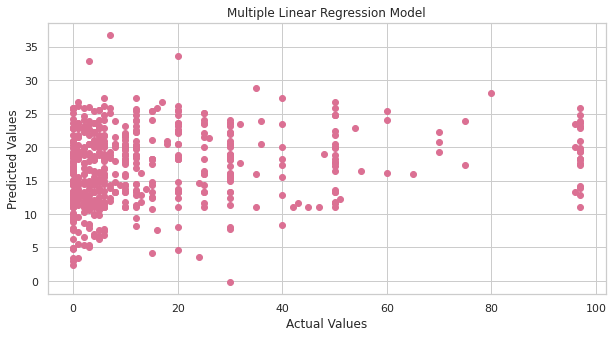

In [ ]:
# Plotting our predictions
plt.figure(figsize=(10,5))
plt.scatter(Y_test, lm_predictions, c = 'palevioletred')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("Multiple Linear Regression Model")

Text(0.5, 1.0, 'Gradien Boosting Model')

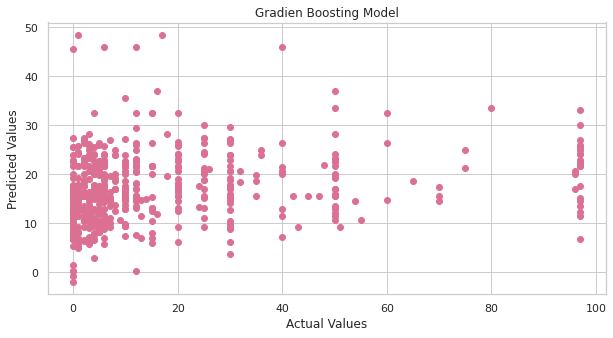

In [ ]:
# Plotting our predictions
plt.figure(figsize=(10,5))
plt.scatter(Y_test, gbm_predictions, c = 'palevioletred')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("Gradien Boosting Model")

Text(0.5, 1.0, 'Decision Tree Model')

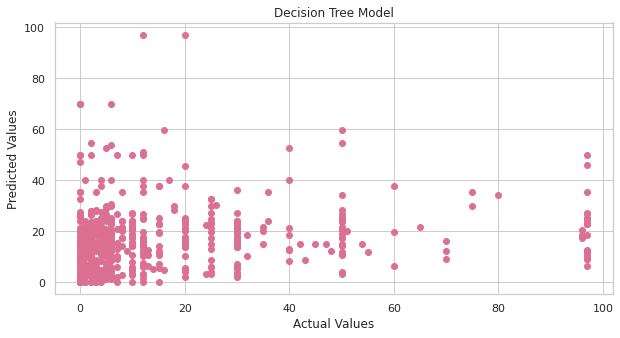

In [ ]:
# Plotting our predictions
plt.figure(figsize=(10,5))
plt.scatter(Y_test, dt_predictions, c = 'palevioletred')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("Decision Tree Model")